In [78]:
import random
from random import randrange
import copy
import matplotlib.pyplot as plt
import imageio

In [81]:
def plotResult(np_dots, cycles):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.show()
    
def plotPartResult(np_dots, cycles,i):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.plot(np_dots[:,0], np_dots[:,1], ".")
    plt.savefig(f'plots/{i}.png')
    plt.show()    

In [101]:
#loading datasets 
import numpy as np
kroa={}
krob={}
np_kroa=[]
np_krob=[]
with open('kroa100.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        kroa[x[0]]=(x[1],x[2])
        np_kroa.append((x[1],x[2]))
np_kroa=np.array(np_kroa)
with open('krob100.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        krob[x[0]]=(x[1],x[2])
        np_krob.append((x[1],x[2]))

np_kroa=np.array(np_kroa)
np_krob=np.array(np_krob)

# print(np_kroa)
# print(np_krob)

# Rezultat - wspolrzedne punktow z datasetu kroa i krob w dwóch strukturach - np_array i dict (z id jako klucz)

In [102]:
#calculating distance matrix - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance_matrix.html
from scipy.spatial import distance_matrix
dista=distance_matrix(np_kroa,np_kroa)
distb=distance_matrix(np_krob,np_krob)
print(dista)

[[   0.         1692.82987923 2252.27085405 ...  782.65254104
  1468.2523625  2643.49408927]
 [1692.82987923    0.         1708.46978317 ... 1911.41099714
  3155.99366286 1830.8052873 ]
 [2252.27085405 1708.46978317    0.         ... 1786.23542681
  3314.91553437  454.27854891]
 ...
 [ 782.65254104 1911.41099714 1786.23542681 ...    0.
  1535.21985396 2227.58434184]
 [1468.2523625  3155.99366286 3314.91553437 ... 1535.21985396
     0.         3760.45316418]
 [2643.49408927 1830.8052873   454.27854891 ... 2227.58434184
  3760.45316418    0.        ]]


cycle[0]: 16435.937657061215
cycle[1]: 18495.36067837887
cycle[0]: 16342.327714837375
cycle[1]: 18495.36067837887
cycle[0]: 16593.141914648037
cycle[1]: 18495.36067837887
cycle[0]: 16573.481098885084
cycle[1]: 14574.062180896392
cycle[0]: 18371.892799101122
cycle[1]: 15269.30408454291
cycle[0]: 16520.09111778998
cycle[1]: 18495.36067837887
cycle[0]: 17770.324859640314
cycle[1]: 15269.30408454291
cycle[0]: 18287.655581742612
cycle[1]: 15269.30408454291
cycle[0]: 19131.80306430012
cycle[1]: 15269.30408454291
cycle[0]: 17043.142815922376
cycle[1]: 15269.30408454291
cycle[0]: 16387.84212712146
cycle[1]: 17496.36417275887
cycle[0]: 15809.95585933211
cycle[1]: 17517.6676563449
cycle[0]: 14920.081421706944
cycle[1]: 14573.90737660419
cycle[0]: 16593.141914648037
cycle[1]: 18495.36067837887
cycle[0]: 17709.39267790875
cycle[1]: 15269.30408454291
cycle[0]: 15314.122814075008
cycle[1]: 17435.25035673731
cycle[0]: 16653.84670674893
cycle[1]: 18495.36067837887
cycle[0]: 13915.55312195459
cycle[1]:

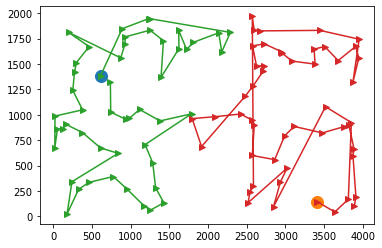

In [105]:
from random import randrange
import copy
#Budowa dwóch cykli metodą najbliższego sąsiada

#THE DATASET - który zbior wybieramy
choice="kroa"

#INITIALIZING RESULTS VARIABLES
results=[]
min_result=np.inf
max_result=0

#LOOP TO GATHER ALL RESULTS
for i in range(0,100):
    
    if choice=="kroa":
        dataset=np_kroa
        dic=kroa
        dist=copy.deepcopy(dista)
        dist_stable=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dic=krob
        dist=copy.deepcopy(distb)
        dist_stable=copy.deepcopy(distb)


    #zmiana dystansu przekątnej na nieskonczonosc
    np.fill_diagonal(dist, np.inf)

    cycles={}
    cycles[0]=[randrange(100)]
    cycles[1]=[(np.argsort(dist[cycles[0][0]])[-2])]

    for b in range(2):
        dist[:,int(cycles[b][0])]=np.inf

    chosenCycle=1
    for i in range(0,98):
        chosenCycle = int((chosenCycle + 1)%2)
        candidates=[]
        for z,index in enumerate(cycles[chosenCycle]):
            candidates.append((np.argmin(dist[index]),np.min(dist[index]),z))
        candidates=np.array(candidates)
        x=np.argmin(candidates[:,1])
        cycles[chosenCycle]=np.insert(cycles[chosenCycle],int(candidates[x,2]),int(candidates[x,0]))
        dist[:,int(candidates[x,0])]=np.inf
    #     if chosenCycle % 2 == 1:
    #         plotPartResult(np_kroa, cycles, i)
    
    print(f"cycle[0]: {calcDistance(cycles[0], dist_stable)}")
    print(f"cycle[1]: {calcDistance(cycles[1], dist_stable)}")
    
    #SAVING RESULTS 
    results.append(calcDistance(cycles[0],dist_stable)+calcDistance(cycles[1],dist_stable))
    if results[-1]>max_result:
        max_result=results[-1]
    if results[-1]<min_result:
        min_result=results[-1]
        plt.clf()
        plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
        plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)
        plt.plot(dataset[:,0][cycles[0]], dataset[:,1][cycles[0]], "->")
        plt.plot(dataset[:,0][cycles[1]], dataset[:,1][cycles[1]], "->")
        plt.savefig(f'best_NN_{choice}.png')
    
    

#SAVING RESULTS
average_result=np.mean(np.array(results))
with open(f"NN_results_{choice}.txt","w") as f:
    f.write(f"{average_result} ({min_result} - {max_result})")

#SHOWING RESULTS HERE
print(min_result,max_result,average_result)
plt.show()


# task2

In [112]:
def calcDistance(currentCycle, dist):
    distance = 0
    for x,y in zip(currentCycle, [*currentCycle[1:], currentCycle[0]]):
        distance += dist[x][y]
    return distance

In [113]:
def findNewCycle(currentCycle, newV, dist):
    distance = 0
    minNewCycle = None
    minDistance = np.inf
    for i in range(len(currentCycle)+1):
        newCycle = copy.deepcopy(currentCycle)
        newCycle.insert(i, newV)
        distance = calcDistance(newCycle, dist)
        
        if distance < minDistance:
            minDistance = distance 
            minNewCycle = newCycle
        
    return minDistance, minNewCycle

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
168712.4601118386 187804.15939339207 181118.25008223075


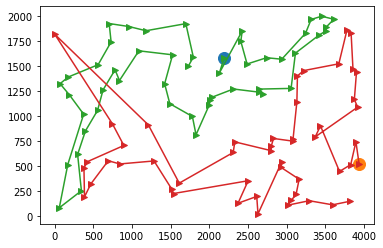

In [114]:
#INITIALIZING RESULTS VARIABLES
results=[]
min_result=np.inf
max_result=0

#THE DATASET - który zbior wybieramy
choice="krob"

if choice=="kroa":
    dataset=np_kroa
    dic=kroa
    dist=copy.deepcopy(dista)
else:
    dataset=np_krob
    dic=krob
    dist=copy.deepcopy(distb)

#zmiana dystansu przekątnej na nieskonczonosc
np.fill_diagonal(dist, np.inf)

#LOOP TO GATHER ALL RESULTS
for i in range(0,100):
    print(i)
    cycles={}
    cycles[0]=[]
    cycles[1]=[]
    #mając macierz odległosci dodawac zawsze najblizszy wobec wszystkich i wstawiac go w cykl po tym dla ktorego odleglosc znaleziono

    # select starting vertex
    cycles[0].append(randrange(100))
    cycles[1].append(np.argsort(dist[cycles[0][0]])[-2])
    #print(cycles)
    chosenCycle = 1
    for i in range(98):
        #print(i)
        chosenCycle = (chosenCycle + 1)%2
        minDistance = np.inf
        minVertex = None
        minPath = None

        for vertex in range(len(dist)):
            if vertex in [*cycles[0], *cycles[1]]: 
                continue
            distance, path = findNewCycle(cycles[chosenCycle], vertex, dist)
            if distance < minDistance:
                minDistance = distance
                minVertex = vertex
                minPath = path
        #print(f"chosenCycle: {chosenCycle}; minVertex: {minVertex}, minDistance: {minDistance}")
        cycles[chosenCycle] = minPath

       # if chosenCycle % 2 == 1:
       #     plotPartResult(dataset, cycles, i)


    #SAVING RESULTS 
    results.append(calcDistance(cycles[0],dist_stable)+calcDistance(cycles[1],dist_stable))
    if results[-1]>max_result:
        max_result=results[-1]
    if results[-1]<min_result:
        min_result=results[-1]
        plt.clf()
        plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
        plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)
        plt.plot(dataset[:,0][cycles[0]], dataset[:,1][cycles[0]], "->")
        plt.plot(dataset[:,0][cycles[1]], dataset[:,1][cycles[1]], "->")
        plt.savefig(f'best_zad2_{choice}.png')
    
    

#SAVING RESULTS
average_result=np.mean(np.array(results))
with open(f"zad2_results_{choice}.txt","w") as f:
    f.write(f"{average_result} ({min_result} - {max_result})")

#SHOWING RESULTS HERE
print(min_result,max_result,average_result)
plt.show()


Wybierz losowo wierzchołki startowe dla cycleA oraz cycleB
for i in range(98):
    wybierz co drugi cykl do rozbudowy:
        minDistance = np.inf
        for vertex in range(100):
            if vertex w użyciu:
                contine
            distance, newCycle = findNewCycle(vertex)
            if distance < minDistance:
                minDistance = distance
                minCycle = newCycle
        Podmień cycle na minCycle w aktualnie rozbudowywanym cyklu


def findNewCycle(vertex):
    minDistance = np.inf
    for i in range(długość rozbudowywanego cyklu + 1):
        wstaw sprawdzany vertex w miejsce "i" do aktualnego cyklu
        distance = obliczDługośćCyklu()
        if distance < minDistance:
            minDistance = distance
            minVertex = vertex
            minPath = path
    return minDistance, minPath
    

In [92]:
filenames = []
for i in range(1,98,2):   
    # create file name and append it to a list
    filename = f'plots/{i}.png'
    filenames.append(filename)

# build gif
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Task 3

In [115]:
def findNewCycle(currentCycle, newV, dist):
    distance = 0
    minNewCycle = None
    #minNewSecondCycle = None
    minDistance = np.inf
    minSecondDistance = np.inf
    for i in range(len(currentCycle)+1):
        newCycle = copy.deepcopy(currentCycle)
        newCycle.insert(i, newV)
        distance = calcDistance(newCycle, dist)
        
        if distance < minDistance:
            minDistance = distance 
            minNewCycle = newCycle
            continue
            
        if distance < minSecondDistance:
            minSecondDistance = distance 
            #minNewSecondCycle = newCycle
    regret = np.abs(minSecondDistance - minDistance)
    return regret, minNewCycle

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
159429.53775885818 190874.57725320914 175305.87784597639


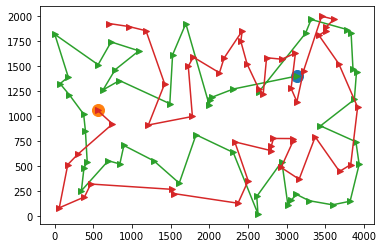

In [116]:
#INITIALIZING RESULTS VARIABLES
results=[]
min_result=np.inf
max_result=0

#THE DATASET - który zbior wybieramy
choice="krob"

if choice=="kroa":
    dataset=np_kroa
    dic=kroa
    dist=copy.deepcopy(dista)
else:
    dataset=np_krob
    dic=krob
    dist=copy.deepcopy(distb)

#zmiana dystansu przekątnej na nieskonczonosc
np.fill_diagonal(dist, np.inf)

#LOOP TO GATHER ALL RESULTS
for i in range(0,100):
    print(i)
    cycles={}
    cycles[0]=[]
    cycles[1]=[]
    #mając macierz odległosci dodawac zawsze najblizszy wobec wszystkich i wstawiac go w cykl po tym dla ktorego odleglosc znaleziono

    # select starting vertex
    cycles[0].append(randrange(100))
    cycles[1].append(np.argsort(dist[cycles[0][0]])[-2])
    #print(cycles)
    chosenCycle = 1
    for i in range(98):
        #print(i)
        chosenCycle = (chosenCycle + 1)%2
        maxRegret = -np.inf
        minVertex = None
        minPath = None

        for vertex in range(len(dist)):
            if vertex in [*cycles[0], *cycles[1]]: 
                continue
            regret, path = findNewCycle(cycles[chosenCycle], vertex, dist)
            if regret > maxRegret:
                maxRegret = regret
                minVertex = vertex
                minPath = path
        #print(f"chosenCycle: {chosenCycle}; minVertex: {minVertex}, minDistance: {minDistance}")
        cycles[chosenCycle] = minPath

#         if chosenCycle % 2 == 1:
#             plotPartResult(np_kroa, cycles, i)        

    #SAVING RESULTS 
    results.append(calcDistance(cycles[0],dist_stable)+calcDistance(cycles[1],dist_stable))
    if results[-1]>max_result:
        max_result=results[-1]
    if results[-1]<min_result:
        min_result=results[-1]
        plt.clf()
        plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
        plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)
        plt.plot(dataset[:,0][cycles[0]], dataset[:,1][cycles[0]], "->")
        plt.plot(dataset[:,0][cycles[1]], dataset[:,1][cycles[1]], "->")
        plt.savefig(f'best_zad3_{choice}.png')
    
    
#SAVING RESULTS
average_result=np.mean(np.array(results))
with open(f"zad3_results_{choice}.txt","w") as f:
    f.write(f"{average_result} ({min_result} - {max_result})")

#SHOWING RESULTS HERE
print(min_result,max_result,average_result)
plt.show()

Wybierz losowo wierzchołki startowe dla cycleA oraz cycleB
for i in range(98):
    wybierz co drugi cykl do rozbudowy:
        minDistance = np.inf
        for vertex in range(100):
            if vertex w użyciu:
                contine
            regret, newCycle = findNewCycle(vertex)
            if regret > maxRegret:
                maxRegret = regret
                minCycle = newCycle
        Podmień cycle na newCycle w aktualnie rozbudowywanym cyklu


def findNewCycle(vertex):
    minDistance = np.inf
    minSecondDistance = np.inf
    for i in range(długość rozbudowywanego cyklu + 1):
        wstaw sprawdzany vertex w miejsce "i" do aktualnego cyklu
        distance = obliczDługośćCyklu()
        if distance < minDistance:
            minDistance = distance 
            minNewCycle = newCycle
            continue
        if distance < minSecondDistance:
            minSecondDistance = distance 
    return minDistance, minPath